# This is a dataset that predicts whether a patient will experience heart failure or not. 
There are 12 feature(columns) Following are independent vars:
Age: Age of a person.
Anaemia: Tells us whether the patient has anaemia or not.
creatinine_phosphokinase; platelets; serum_creatinine; serum_sodium : tells us the info of the same from the patient.
Diabetes and High blood pressure : 1 if yes; 0 if no.
ejection fraction: is the most important feature it tells amount of blood the left ventricle pumps out with each contraction.
Sex: Male gender if 1; Female gender if 0.
Smoking: 1 if patient is a smoker; 0 to show that he does not smoke.
Time: Follow-up time in days , which means when the record was last updated for that patient. 
DEATH_EVENT: This is the dependent var which says if the patient had a heart failure or not.

# DEVELOPMENT STAGES:
Initially, when I used all the independent features without studying the outliers and data the accuracy of the model was at 76%. I used Backward Elimination to pick the most important 5 features from the data which further increases the model accuracy to 82%. But the max_features parameter wass more successful in selecting the features. Later, When I started adding visualizations for the data I realised two things:
1) The data had outliers in almost all the features but it would have been wrong to remove all the outliers without having domain knowledge.
2) The data was not balaced because of which Decision Tree could not study the relations. I studied that the answer to balance this data is using SMOTE. However, it was not possible to learn and implement it in a week. But i will surely update my model as soon as I am done. That will definetly give me a better accuracy

## Data Aquisition and Formating

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
hrt_data = pd.read_csv('C:\\Users\\Shrita\\Desktop\\DurhamAI_clone\\DurhamAI\\AI_ALGO\\EXE1\\hrt_fail.csv')

In [3]:
hrt_data.shape

(299, 13)

In [4]:
hrt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
print('These are the names of features in the dataset', list(hrt_data))

These are the names of features in the dataset ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


### The dataset has all the numeric data(There are no categorical data.) Even the labels are mentioned in 1's and 0's

# EDA

In [6]:
import sweetviz as sv
hrt_report = sv.analyze(hrt_data)

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [7]:
hrt_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# I have added some of the most important visualizations of the dataset, some were taken from the sweetviz report

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

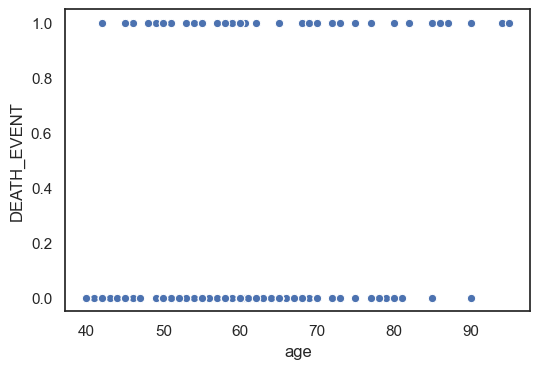

In [8]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
sns.scatterplot(x="age", y="DEATH_EVENT", data= hrt_data )

The data represents that from the age of 40 to 70 very less people suffered from heart attack

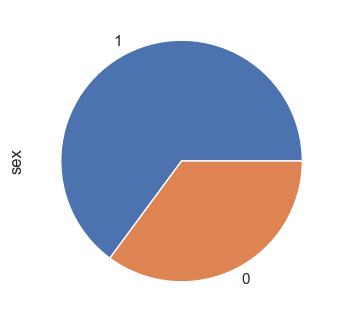

In [9]:
hrt_data['sex'].value_counts().plot.pie()
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

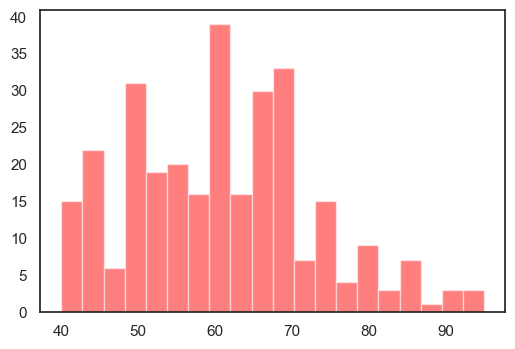

In [10]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
num_bins = 20
x= hrt_data['age']
n, bins, patches = plt.hist(x, num_bins, facecolor='red', alpha=0.5)
plt.show()

The chart says that there were more male patients in the data than female. Also, the age ranges from 40 to 90. There are more people in the range 50-70 and less above 90.Although, sex and age are not an important feature this visualization is important for general information about people participating in the survey

### I have used boxplots on important columns to check for the outliers and there were a lot of outliers. However, it is not sensible to remove all the outliers without domain knowledge. After studying I realised that only the outliers in ejection_fraction were removable

<AxesSubplot:xlabel='serum_creatinine'>

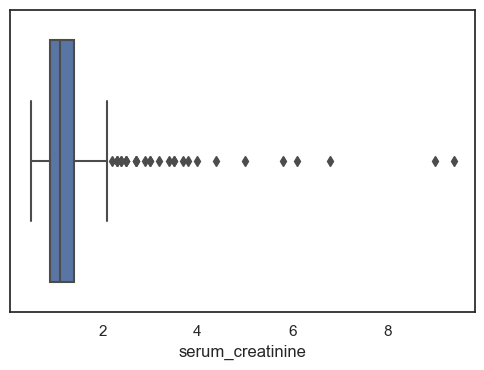

In [11]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
sns.boxplot(x="serum_creatinine", data= hrt_data )

<AxesSubplot:xlabel='platelets'>

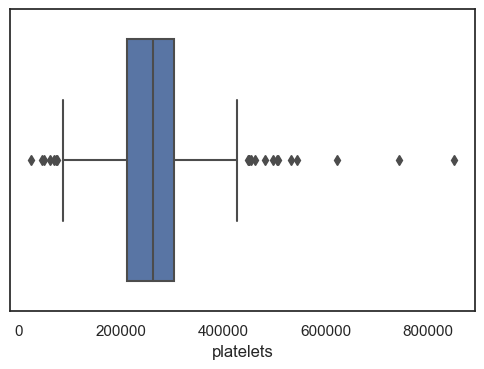

In [12]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
sns.boxplot(x="platelets", data= hrt_data )

<AxesSubplot:xlabel='ejection_fraction'>

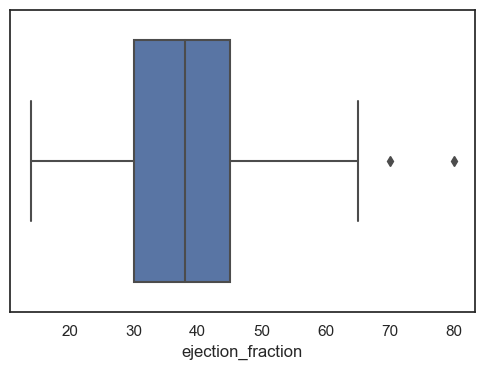

In [13]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
sns.boxplot(x="ejection_fraction", data= hrt_data )

# Feature Engineering
From the visualiztions I have decided to remove the outliers for ejection_fraction column.
Other than that the data looks clean and there are no missing values
The labels are encoded

In [14]:
#Removing the outliers
hrt_data = hrt_data[hrt_data['ejection_fraction']<70]
hrt_data['DEATH_EVENT'].value_counts()

0    202
1     95
Name: DEATH_EVENT, dtype: int64

# Fitting dataset to Decision Tree Classifier

### This model has all the features, I have not split the data into train and test set. The data is also not standardised

In [15]:
X = pd.DataFrame(hrt_data.iloc[:, :-1]).values
# This will select all the columns except the last column ans set it as X(features)

In [16]:
y = pd.DataFrame(hrt_data.iloc[:, -1]).values
# This has the last column 

In [17]:
# Defining and fitting a DecisionTreeClassifier instance
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(max_depth = 4)
classifier1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
from sklearn import tree
plt.figure(figsize=(500,200))
tree.plot_tree(classifier1,filled = True, fontsize = 150)
plt.show() 

# PREDICTION

In [ ]:
hrt_fail_pred = int(classifier1.predict([[23,1,80,1,60,0,1.2,2.1,130,1,1,24]]))
if y[hrt_fail_pred] == 1:
    var23 = 'will experience heart failure'
else:
    var23 = 'will not experience heart failure'


print(f" Considering the data inputted the patient {var23}.")

-----------DEVELOPMENT - 1---------------------

I will start the first development by splitting test and train data and standardising them

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
#Splitting the test and train data

In [ ]:
#Scaling the data through standardisation
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy',random_state = 0, max_depth = 4)
classifier2.fit(X_train, y_train)

In [ ]:
y_pred = classifier2.predict(X_test)
y_test.shape
y_pred.shape

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
re = classification_report(y_pred, y_test)
print(cm)
print(ac)
print(re)

# PREDICTION

In [ ]:
hrt_fail_pred = int(classifier2.predict([[23,1,80,1,60,0,1.2,2.1,130,1,1,24]]))
if y[hrt_fail_pred] == 1:
    var23 = 'will experience heart failure'
else:
    var23 = 'will not experience heart failure'


print(f" Considering the data inputted the patient {var23}.")

-----------DEVELOPMENT - 2---------------------

I will add more data to test set and add the model parameter max_features as 5.   
I have tried various combination of max_features but the best accuracy was at 5.

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)
#Splitting the test and train data

In [ ]:
#Scaling the data through standardisation
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train1 = sc_x.fit_transform(X_train1)
X_test1 = sc_x.transform(X_test1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(criterion = 'entropy',random_state = 0, max_features = 5)
classifier3.fit(X_train1, y_train1)

In [ ]:
y_pred2 = classifier3.predict(X_test1)
y_test.shape
y_pred.shape

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test1, y_pred2)
ac = accuracy_score(y_test1, y_pred2)
re = classification_report(y_pred2, y_test1)
print(cm)
print(ac)
print(re)

In [ ]:
hrt_fail_pred = int(classifier3.predict([[23,0,80,0,60,0,1.2,2.1,130,0,0,24]]))
if y[hrt_fail_pred] == 1:
    var23 = 'will experience heart failure'
else:
    var23 = 'will not experience heart failure'


print(f" Considering the data inputted the patient {var23}.")

In [ ]:
from sklearn import tree
plt.figure(figsize=(500,200))
tree.plot_tree(classifier3,filled = True, fontsize = 150)
plt.show() 

# Summary
The precision percent is at 95. But i could not find proper and more data 
The data I received is highly unbalanced which makes the decision tree improper.
As a future scope of this model I will try to use a dataset with more data or balance the data using SMOTE